In [ ]:
# Basic Imports & Dataset Download

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
file_path = "/home/surendran/rag_local/data/breast-cancer-wisconsin-data.csv"
df = pd.read_csv(file_path)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
file_path = "/home/surendran/rag_local/data/breast-cancer-wisconsin-data.csv"
df = pd.read_csv(file_path)


In [ ]:
# Explained Variance versus Test Accuracy

# features and labels
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# PCA settings
pca_components = [3, 6, 9, 12]

results = []

for n in pca_components:
    pca = PCA(n_components=n)
    
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca  = pca.transform(X_test_scaled)
    
    svc = SVC(kernel='linear')
    svc.fit(X_train_pca, y_train)
    
    y_pred = svc.predict(X_test_pca)
    
    acc = accuracy_score(y_test, y_pred)
    var = pca.explained_variance_ratio_.sum() * 100
    
    results.append([n, var, acc])

# results table
results_df = pd.DataFrame(
    results,
    columns=["n_components", "explained_variance_%", "test_accuracy"]
)

print(results_df)


   n_components  explained_variance_%  test_accuracy
0             3             72.723419       0.947368
1             6             88.927961       0.973684
2             9             94.041249       0.973684
3            12             97.120805       0.964912


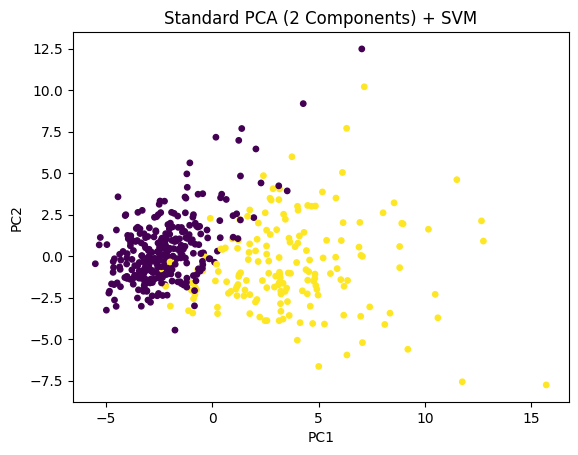

In [ ]:
## Experiment 1(a)  : Try PCA with only 2 principle components (Visual understanding)


# drop id and diagnosis
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

plt.figure()
plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train,
    s=15
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Standard PCA (2 Components) + SVM")
plt.show()



Accuracy: 0.9473684210526315
Confusion Matrix:
 [[71  1]
 [ 5 37]]


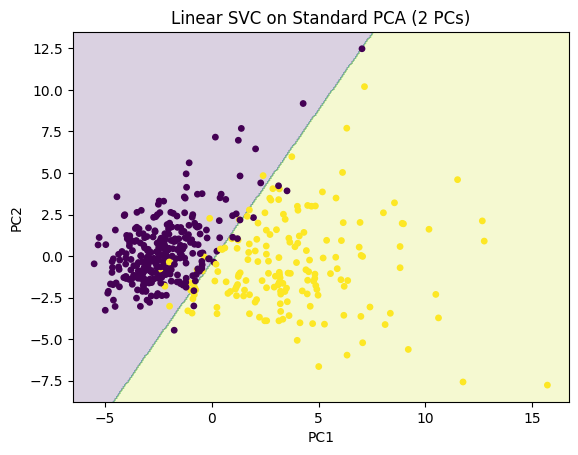

In [ ]:

## Experiment 1(b)  : Try PCA with only 2 principle components + SVM 


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# linear SVC
svc = SVC(kernel='linear')
svc.fit(X_train_pca, y_train)

# predictions
y_pred = svc.predict(X_test_pca)

# metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# decision boundary plot (train data)
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Linear SVC on Standard PCA (2 PCs)")
plt.show()


In [ ]:
## Experiment 2 : Instead of PCA, try with features with max variations
# Step 1 : identify features with max standard deviation


# standard deviation of original features
feature_std = df.std(numeric_only=True)

# sort descending
feature_std_sorted = feature_std.sort_values(ascending=False)

#print(feature_std_sorted)

# remove id (keep original scale)
feature_std = df.drop(columns=['id']).std(numeric_only=True)

# sort descending
feature_std_sorted = feature_std.sort_values(ascending=False)

print(feature_std_sorted)

area_worst                 569.356993
area_mean                  351.914129
area_se                     45.491006
perimeter_worst             33.602542
perimeter_mean              24.298981
texture_worst                6.146258
radius_worst                 4.833242
texture_mean                 4.301036
radius_mean                  3.524049
perimeter_se                 2.021855
texture_se                   0.551648
radius_se                    0.277313
concavity_worst              0.208624
compactness_worst            0.157336
concavity_mean               0.079720
concave points_worst         0.065732
symmetry_worst               0.061867
compactness_mean             0.052813
concave points_mean          0.038803
concavity_se                 0.030186
symmetry_mean                0.027414
smoothness_worst             0.022832
fractal_dimension_worst      0.018061
compactness_se               0.017908
smoothness_mean              0.014064
symmetry_se                  0.008266
fractal_dime

In [ ]:
## Experiment 2 
# step 2 - Accuracy metrics based on manual choice of features (manual variance)

import numpy as np
import pandas as pd

# X: original features DataFrame
X_custom = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})



# Component 1
comp1 = X_custom['area_worst'] + X_custom['area_mean']

# Component 2: next 6 high-variance features
comp2_features = [
    'area_se',
    'perimeter_worst',
    'perimeter_mean',
    'texture_worst',
    'radius_worst',
    'texture_mean'
]

comp2 = X_custom[comp2_features].sum(axis=1)

# Combine into 2D dataset
X_manual = np.column_stack((comp1, comp2))


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_manual, y, test_size=0.2, random_state=42, stratify=y
)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9298245614035088
Confusion Matrix:
 [[70  2]
 [ 6 36]]


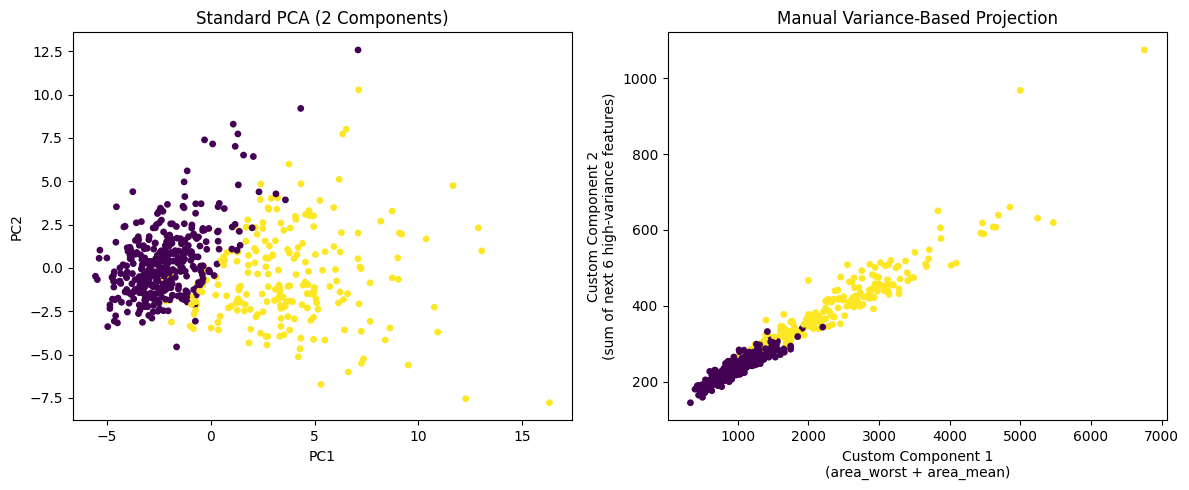

In [34]:
## Experiment 2 
# step 3 - Compare plots on 2 major PCAs versus Feature based plot


# -------- Standard PCA (2 components) --------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['id', 'diagnosis']))

pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_scaled)

# -------- Custom variance-based projection --------
X_custom = df.drop(columns=['id', 'diagnosis'])

comp1 = X_custom['area_worst'] + X_custom['area_mean']

comp2_features = [
    'area_se',
    'perimeter_worst',
    'perimeter_mean',
    'texture_worst',
    'radius_worst',
    'texture_mean'
]
comp2 = X_custom[comp2_features].sum(axis=1)

X_manual_2 = np.column_stack((comp1, comp2))

# labels
y = df['diagnosis'].map({'M': 1, 'B': 0})


plt.figure(figsize=(12, 5))

# Standard PCA
plt.subplot(1, 2, 1)
plt.scatter(
    X_pca_2[:, 0],
    X_pca_2[:, 1],
    c=y,
    s=15
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Standard PCA (2 Components)")

# Custom projection
plt.subplot(1, 2, 2)
plt.scatter(
    X_manual_2[:, 0],
    X_manual_2[:, 1],
    c=y,
    s=15
)
plt.xlabel("Custom Component 1\n(area_worst + area_mean)")
plt.ylabel("Custom Component 2\n(sum of next 6 high-variance features)")
plt.title("Manual Variance-Based Projection")

plt.tight_layout()
plt.show()


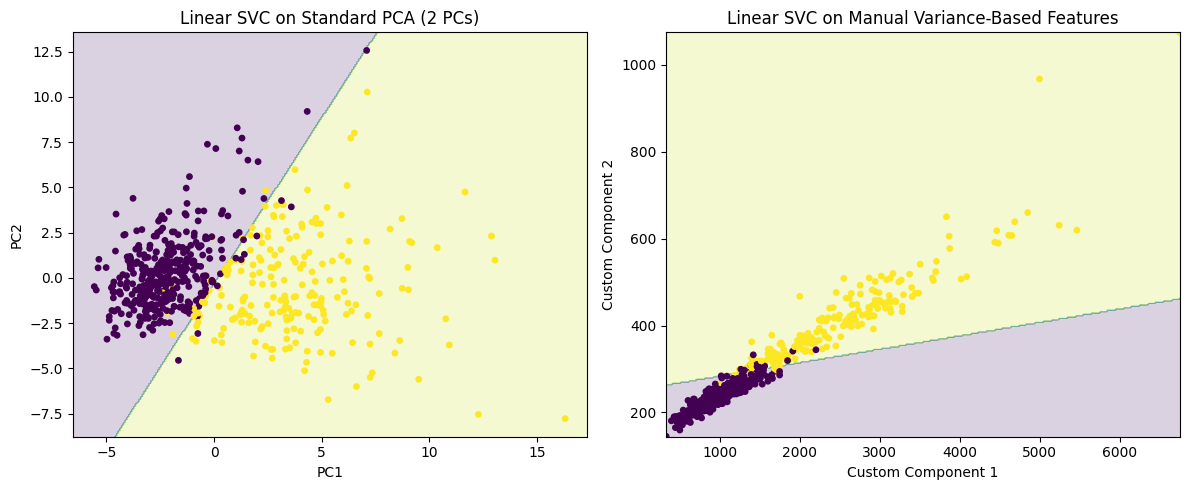

In [35]:
## Experiment 2 
# step 4 - Compare SVC based on both above choices for better visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def plot_svc_boundary(X, y, title, xlabel, ylabel):
    svm = SVC(kernel='linear')
    svm.fit(X, y)

    # create grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_svc_boundary(
    X_pca_2,
    y,
    title="Linear SVC on Standard PCA (2 PCs)",
    xlabel="PC1",
    ylabel="PC2"
)
plt.subplot(1, 2, 2)
plot_svc_boundary(
    X_manual_2,
    y,
    title="Linear SVC on Manual Variance-Based Features",
    xlabel="Custom Component 1",
    ylabel="Custom Component 2"
)

plt.tight_layout()
plt.show()


In [39]:
## Experiment 3
# Comparing result of standard Train Test split process against Wrong order  (Academic interest)


from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# PCA with 8 components (CORRECT order)
pca = PCA(n_components=8)
X_train_pca_8 = pca.fit_transform(X_train_scaled)
X_test_pca_8  = pca.transform(X_test_scaled)

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca_8, y_train)

# Predictions
y_pred_correct = svm_model.predict(X_test_pca_8)

# Accuracy
acc_correct = accuracy_score(y_test, y_pred_correct)
print(f"Test Accuracy with correct split order: {acc_correct:.4f}")

Test Accuracy with correct split order: 0.9825


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# ❌ Scale on full data
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X)

# ❌ PCA on full data
pca = PCA(n_components=8)
X_pca_full = pca.fit_transform(X_scaled_full)

# ❌ Train-test split AFTER PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca_full, y, test_size=0.2, random_state=42, stratify=y
)

# SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train)

# Predictions
y_pred = svm_model.predict(X_test_pca)


# accuracy
acc_leakage = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with PCA-before-split (LEAKAGE): {acc_leakage:.4f}")

Test Accuracy with PCA-before-split (LEAKAGE): 0.9825
